# Text Mining Process for Face Recognition Data

## Getting the desired text from the patents

We start from parsing the files containing the patents and look for the ones which can give us useful information about the topic we are interested into.
This is going to take some minutes.

In [2]:
import os
import re
path = 'C:\\Users\\stefa\\OneDrive\\Desktop\\Uni\\Business\\Project\\Material\\MyPatents'
print("Getting files...")
# getting all files from the directory given by the path
files = os.listdir(path)
# moving to the desired directory
os.chdir(path)
text = ""
print("START!")
for filename in files:
    file = open(filename, encoding="utf-8")
    text+=file.read();
print("END!")


Getting files...
START!
END!


After obtaining the whole text of the file of our interest, we separate the sections containing the abstract and the claims, which are the two sections we are interested on for our analysis

In [3]:
p1 = ""
p1=re.findall(r'(?<=<abstract>\n)(?s:.*?)(?=\n</abstract>)',text)
print(p1)
print("ABSTRACT TEXT OBTAINED!")

['An electronic apparatus including an image capturing device, a storage device and a processor and an operation method thereof are provided. The image capturing device captures an image for a user, and the storage device records a plurality of modules. The processor is coupled to the image capturing device and the storage device and is configured to: configure the image capturing device to capture a head image of a user; perform a face recognition operation to obtain a face region; detect a plurality of facial landmarks within the face region; estimate a head posture angle of the user according to the facial landmarks; calculate a gaze position where the user gazes on the screen according to the head posture angle, a plurality of rotation reference angle, and a plurality of predetermined calibration positions; and configure the screen to display a corresponding visual effect according to the gaze position.', 'The present disclosure provides a computation method and product thereof. Th

In [4]:
p2 = ""
p2=re.findall(r'(?<=<claims>\n)(?s:.+?)(?=\n</claims>)',text)
print(p2)
print("CLAIM TEXT OBTAINED!")

['1. An electronic device (10), configured to make a screen (110) to display a plurality of image frames, comprising: an image capturing device (120); a storage device (130), storing a plurality of modules; and a processor (14), coupled to the image capturing device (140) and the storage device (130), configured to execute the modules in the storage device (130) to: configure the screen (110) to display a plurality of marker objects at a plurality of predetermined calibration positions; configure the image capturing device (120) to capture a plurality of first head images when a user is looking at the predetermined calibration positions; (S301) perform a plurality of first face recognition operations on the first head images to obtain a plurality of first face regions corresponding to the predetermined calibration positions; (S302) detect a plurality of first facial landmarks corresponding to the first face regions; (S303) calculate a plurality of rotation reference angles of the user 

### Text cleaning
First we lower the text for both sections, then we do the whitespace and punctuation removal.

In [5]:
# lower() is a Python function for strings
lower_atext = ""
for abstract_text in p1:
    lower_atext += abstract_text.lower() #we pick each word and add to a variable, which will contain all the text
lower_atext

"an electronic apparatus including an image capturing device, a storage device and a processor and an operation method thereof are provided. the image capturing device captures an image for a user, and the storage device records a plurality of modules. the processor is coupled to the image capturing device and the storage device and is configured to: configure the image capturing device to capture a head image of a user; perform a face recognition operation to obtain a face region; detect a plurality of facial landmarks within the face region; estimate a head posture angle of the user according to the facial landmarks; calculate a gaze position where the user gazes on the screen according to the head posture angle, a plurality of rotation reference angle, and a plurality of predetermined calibration positions; and configure the screen to display a corresponding visual effect according to the gaze position.the present disclosure provides a computation method and product thereof. the com

In [6]:
lower_ctext = ""
for claim_text in p2:
    lower_ctext += claim_text.lower() #we pick each word and add to a variable, which will contain all the text
lower_ctext

'1. an electronic device (10), configured to make a screen (110) to display a plurality of image frames, comprising: an image capturing device (120); a storage device (130), storing a plurality of modules; and a processor (14), coupled to the image capturing device (140) and the storage device (130), configured to execute the modules in the storage device (130) to: configure the screen (110) to display a plurality of marker objects at a plurality of predetermined calibration positions; configure the image capturing device (120) to capture a plurality of first head images when a user is looking at the predetermined calibration positions; (s301) perform a plurality of first face recognition operations on the first head images to obtain a plurality of first face regions corresponding to the predetermined calibration positions; (s302) detect a plurality of first facial landmarks corresponding to the first face regions; (s303) calculate a plurality of rotation reference angles of the user l

In [7]:
#white space removal for both sections
def remove_whitespace(text):
    return  " ".join(text.split())

lowera_text = remove_whitespace(lower_atext)
lowera_text
lowerc_text = remove_whitespace(lower_ctext)
lowerc_text

'1. an electronic device (10), configured to make a screen (110) to display a plurality of image frames, comprising: an image capturing device (120); a storage device (130), storing a plurality of modules; and a processor (14), coupled to the image capturing device (140) and the storage device (130), configured to execute the modules in the storage device (130) to: configure the screen (110) to display a plurality of marker objects at a plurality of predetermined calibration positions; configure the image capturing device (120) to capture a plurality of first head images when a user is looking at the predetermined calibration positions; (s301) perform a plurality of first face recognition operations on the first head images to obtain a plurality of first face regions corresponding to the predetermined calibration positions; (s302) detect a plurality of first facial landmarks corresponding to the first face regions; (s303) calculate a plurality of rotation reference angles of the user l

In [8]:
#punctuation and digits removal: we replace any undesired character with a ''
for char in '?.,!/;:()1234567890':  
    lowera_text = lowera_text.replace(char,'')
print(lowera_text)
for char in '?.,!/;:()1234567890':  
    lowerc_text = lowerc_text.replace(char,'')
print(lowerc_text)

an electronic apparatus including an image capturing device a storage device and a processor and an operation method thereof are provided the image capturing device captures an image for a user and the storage device records a plurality of modules the processor is coupled to the image capturing device and the storage device and is configured to configure the image capturing device to capture a head image of a user perform a face recognition operation to obtain a face region detect a plurality of facial landmarks within the face region estimate a head posture angle of the user according to the facial landmarks calculate a gaze position where the user gazes on the screen according to the head posture angle a plurality of rotation reference angle and a plurality of predetermined calibration positions and configure the screen to display a corresponding visual effect according to the gaze positionthe present disclosure provides a computation method and product thereof the computation method

### KeyWord Cleaning
We do a preliminary keyword removal to clean the text from redundant words that are not needed in our analysis

In [9]:
import pke

# initialize keyphrase extraction model, here TopicRank
print("Initializing extractor...")
extractor = pke.unsupervised.TopicRank()

# load the content of the document, here document is expected to be in raw
# format (i.e. a simple text file) and preprocessing is carried out using spacy
print("Loading text...");
extractor.load_document(input=lowera_text, language='en')

# keyphrase candidate selection, in the case of TopicRank: sequences of nouns
# and adjectives (i.e. `(Noun|Adj)*`)
print("Candidate Selection...")
extractor.candidate_selection()

# candidate weighting, in the case of TopicRank: using a random walk algorithm
print("Weighting...")
extractor.candidate_weighting()

# N-best selection, keyphrases contains the 10 highest scored candidates as
# (keyphrase, score) tuples
print("Selecting 10 best candidates...")
keyphrases = extractor.get_n_best(n=10)
for tuple in keyphrases:
    print(tuple[0])
    lowera_text = lowera_text.replace(tuple[0],'')
print(keyphrases)

Initializing extractor...
Loading text...
Candidate Selection...
Weighting...
Selecting 10 best candidates...
image
computation method
user
face recognition operation
device
face region
plurality
processor
system
facial recognitiona camera
[('image', 0.04694284852728213), ('computation method', 0.031442039493363806), ('user', 0.027788302431730104), ('face recognition operation', 0.02196271915915034), ('device', 0.020319617325812032), ('face region', 0.019573677639206713), ('plurality', 0.01656449323088685), ('processor', 0.01628557320191861), ('system', 0.014369073395178037), ('facial recognitiona camera', 0.013183701899647368)]


In [10]:
# initialize keyphrase extraction model, here TopicRank
print("Initializing extractor...")
extractor = pke.unsupervised.TopicRank()

# load the content of the document, here document is expected to be in raw
# format (i.e. a simple text file) and preprocessing is carried out using spacy
print("Loading text...");
extractor.load_document(input=lowerc_text, language='en')

# keyphrase candidate selection, in the case of TopicRank: sequences of nouns
# and adjectives (i.e. `(Noun|Adj)*`)
print("Candidate Selection...")
extractor.candidate_selection()

# candidate weighting, in the case of TopicRank: using a random walk algorithm
print("Weighting...")
extractor.candidate_weighting()

# N-best selection, keyphrases contains the 10 highest scored candidates as
# (keyphrase, score) tuples
print("Selecting 10 best candidates...")
keyphrases = extractor.get_n_best(n=10)
for tuple in keyphrases:
    print(tuple[0])
    lowerc_text = lowerc_text.replace(tuple[0],'')
print(keyphrases)

Initializing extractor...
Loading text...
Candidate Selection...
Weighting...
Selecting 10 best candidates...
claim
image
method
plurality
electronic device
user
faces
second face recognition operation
processor
feature tensors
[('claim', 0.04382683192815315), ('image', 0.027245173031580146), ('method', 0.02484087304737162), ('plurality', 0.02188169701653695), ('electronic device', 0.016951377660441365), ('user', 0.01656228675250289), ('faces', 0.015134349086063339), ('second face recognition operation', 0.013276317914395708), ('processor', 0.013040922806219603), ('feature tensors', 0.012906305396095897)]


In [11]:
from keybert import KeyBERT
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(lowera_text)
for tuple in keywords:
    print(tuple[0])
    lowera_text = lowera_text.replace(tuple[0],'')

print(kw_model.extract_keywords(lowera_text, keyphrase_ngram_range=(1, 1), stop_words=None))

recognition
recognizing
recognitiona
features
classification
[('detection', 0.4378), ('classifier', 0.4285), ('computing', 0.4276), ('classifying', 0.4272), ('supervised', 0.4258)]


In [12]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(lowerc_text)
for tuple in keywords:
    print(tuple[0])
    lowerc_text = lowerc_text.replace(tuple[0],'')

print(kw_model.extract_keywords(lowerc_text, keyphrase_ngram_range=(1, 1), stop_words=None))

calibration
tracking
recognition
orientation
recognizing
[('analyses', 0.4213), ('capturing', 0.4131), ('posture', 0.4113), ('gaze', 0.4086), ('vision', 0.4033)]


### Tokenization
In this step we tokenize the text of both sections.

In [13]:
import nltk
# nltk.download('punkt')
# the output is a list, where each element is a sentence of the original text
nltk.sent_tokenize(lowera_text)
nltk.sent_tokenize(lowerc_text)

[' an   configured to make a screen  to display a  of  frames comprising an  capturing device  a storage device  storing a  of modules and a   coupled to the  capturing device  and the storage device  configured to execute the modules in the storage device  to configure the screen  to display a  of marker objects at a  of predetermined  positions configure the  capturing device  to capture a  of first head s when a  is looking at the predetermined  positions s perform a  of first face  operations on the first head s to obtain a  of first face regions corresponding to the predetermined  positions s detect a  of first facial landmarks corresponding to the first face regions s calculate a  of rotation reference angles of the  looking at the predetermined  positions according to the first facial landmarks configure the  capturing device  to capture a second head  of the  perform a  on the second head  to obtain a second face region detect a  of second facial landmarks within the second fac

In [14]:
# the output is a list, where each element is a token of the original text
tokenized_text_a = nltk.word_tokenize(lowera_text)
print(tokenized_text_a)

tokenized_text_c = nltk.word_tokenize(lowerc_text)
print(tokenized_text_c)

['an', 'electronic', 'apparatus', 'including', 'an', 'capturing', 'a', 'storage', 'and', 'a', 'and', 'an', 'operation', 'method', 'thereof', 'are', 'provided', 'the', 'capturing', 'captures', 'an', 'for', 'a', 'and', 'the', 'storage', 'records', 'a', 'of', 'modules', 'the', 'is', 'coupled', 'to', 'the', 'capturing', 'and', 'the', 'storage', 'and', 'is', 'configured', 'to', 'configure', 'the', 'capturing', 'to', 'capture', 'a', 'head', 'of', 'a', 'perform', 'a', 'to', 'obtain', 'a', 'detect', 'a', 'of', 'facial', 'landmarks', 'within', 'the', 'estimate', 'a', 'head', 'posture', 'angle', 'of', 'the', 'according', 'to', 'the', 'facial', 'landmarks', 'calculate', 'a', 'gaze', 'position', 'where', 'the', 'gazes', 'on', 'the', 'screen', 'according', 'to', 'the', 'head', 'posture', 'angle', 'a', 'of', 'rotation', 'reference', 'angle', 'and', 'a', 'of', 'predetermined', 'calibration', 'positions', 'and', 'configure', 'the', 'screen', 'to', 'display', 'a', 'corresponding', 'visual', 'effect', '

### StopWords removal
We remove the stopwords from the text. The language we are using is english, so we remove the english stopwords.

In [15]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

In [16]:
# we prepare a empty list, which will contain the words after the stopwords removal
tokenized_vector_a = []

# we iterate into the list of tokens obtained through the tokenization
for token in tokenized_text_a:
    # if a token is not a stopword, we insert it in the list
    if token not in stopwords_en:
        tokenized_vector_a.append(token)

# the output is a list of all the tokens of the original text excluding the stopwords
print(tokenized_vector_a)

['electronic', 'apparatus', 'including', 'capturing', 'storage', 'operation', 'method', 'thereof', 'provided', 'capturing', 'captures', 'storage', 'records', 'modules', 'coupled', 'capturing', 'storage', 'configured', 'configure', 'capturing', 'capture', 'head', 'perform', 'obtain', 'detect', 'facial', 'landmarks', 'within', 'estimate', 'head', 'posture', 'angle', 'according', 'facial', 'landmarks', 'calculate', 'gaze', 'position', 'gazes', 'screen', 'according', 'head', 'posture', 'angle', 'rotation', 'reference', 'angle', 'predetermined', 'calibration', 'positions', 'configure', 'screen', 'display', 'corresponding', 'visual', 'effect', 'according', 'gaze', 'positionthe', 'present', 'disclosure', 'provides', 'product', 'thereof', 'adopts', 'fusion', 'method', 'perform', 'machine', 'learning', 'computations', 'technical', 'effects', 'present', 'disclosure', 'include', 'fewer', 'computations', 'less', 'power', 'consumptiona', 'method', 'detecting', 'body', 'information', 'passengers', '

In [17]:
# we prepare a empty list, which will contain the words after the stopwords removal
tokenized_vector_c = []

# we iterate into the list of tokens obtained through the tokenization
for token in tokenized_text_c:
    # if a token is not a stopword, we insert it in the list
    if token not in stopwords_en:
        tokenized_vector_c.append(token)

# the output is a list of all the tokens of the original text excluding the stopwords
print(tokenized_vector_c)

['configured', 'make', 'screen', 'display', 'frames', 'comprising', 'capturing', 'device', 'storage', 'device', 'storing', 'modules', 'coupled', 'capturing', 'device', 'storage', 'device', 'configured', 'execute', 'modules', 'storage', 'device', 'configure', 'screen', 'display', 'marker', 'objects', 'predetermined', 'positions', 'configure', 'capturing', 'device', 'capture', 'first', 'head', 'looking', 'predetermined', 'positions', 'perform', 'first', 'face', 'operations', 'first', 'head', 'obtain', 'first', 'face', 'regions', 'corresponding', 'predetermined', 'positions', 'detect', 'first', 'facial', 'landmarks', 'corresponding', 'first', 'face', 'regions', 'calculate', 'rotation', 'reference', 'angles', 'looking', 'predetermined', 'positions', 'according', 'first', 'facial', 'landmarks', 'configure', 'capturing', 'device', 'capture', 'second', 'head', 'perform', 'second', 'head', 'obtain', 'second', 'face', 'region', 'detect', 'second', 'facial', 'landmarks', 'within', 'second', 'fac

### POS Analysis
We now do the POS analysis: we use the pos tagging to assign each word to its pos tag, then we clean and simplify the pos text.

In [18]:
# nltk.download('averaged_perceptron_tagger')
pos_tagging_a = nltk.pos_tag(tokenized_vector_a)
print(pos_tagging_a)

[('electronic', 'JJ'), ('apparatus', 'NN'), ('including', 'VBG'), ('capturing', 'VBG'), ('storage', 'NN'), ('operation', 'NN'), ('method', 'NN'), ('thereof', 'NN'), ('provided', 'VBD'), ('capturing', 'VBG'), ('captures', 'NNS'), ('storage', 'NN'), ('records', 'NNS'), ('modules', 'NNS'), ('coupled', 'VBD'), ('capturing', 'VBG'), ('storage', 'NN'), ('configured', 'VBD'), ('configure', 'NN'), ('capturing', 'VBG'), ('capture', 'NN'), ('head', 'NN'), ('perform', 'NN'), ('obtain', 'VB'), ('detect', 'JJ'), ('facial', 'JJ'), ('landmarks', 'NNS'), ('within', 'IN'), ('estimate', 'JJ'), ('head', 'NN'), ('posture', 'NN'), ('angle', 'NN'), ('according', 'VBG'), ('facial', 'JJ'), ('landmarks', 'NN'), ('calculate', 'NN'), ('gaze', 'NN'), ('position', 'NN'), ('gazes', 'VBZ'), ('screen', 'JJ'), ('according', 'VBG'), ('head', 'NN'), ('posture', 'NN'), ('angle', 'JJ'), ('rotation', 'NN'), ('reference', 'NN'), ('angle', 'NN'), ('predetermined', 'VBD'), ('calibration', 'NN'), ('positions', 'NNS'), ('config

In [19]:
pos_tagging_c = nltk.pos_tag(tokenized_vector_c)
print(pos_tagging_c)

[('configured', 'VBN'), ('make', 'VBP'), ('screen', 'JJ'), ('display', 'NN'), ('frames', 'NNS'), ('comprising', 'VBG'), ('capturing', 'VBG'), ('device', 'NN'), ('storage', 'NN'), ('device', 'NN'), ('storing', 'VBG'), ('modules', 'NNS'), ('coupled', 'VBN'), ('capturing', 'VBG'), ('device', 'NN'), ('storage', 'NN'), ('device', 'NN'), ('configured', 'VBD'), ('execute', 'JJ'), ('modules', 'NNS'), ('storage', 'NN'), ('device', 'NN'), ('configure', 'NN'), ('screen', 'NN'), ('display', 'NN'), ('marker', 'NN'), ('objects', 'NNS'), ('predetermined', 'VBD'), ('positions', 'NNS'), ('configure', 'NN'), ('capturing', 'VBG'), ('device', 'NN'), ('capture', 'NN'), ('first', 'JJ'), ('head', 'NN'), ('looking', 'VBG'), ('predetermined', 'JJ'), ('positions', 'NNS'), ('perform', 'VBP'), ('first', 'JJ'), ('face', 'NN'), ('operations', 'NNS'), ('first', 'RB'), ('head', 'VBP'), ('obtain', 'VB'), ('first', 'JJ'), ('face', 'NN'), ('regions', 'NNS'), ('corresponding', 'VBG'), ('predetermined', 'JJ'), ('positions

In [20]:
cleaned_POS_text_a = []

for tuple in pos_tagging_a:
    # POS tagged text is a list of tuples, where the first element tuple[0] is a token and the second one tuple[1] is
    # the Part of Speech. If the POS has length == 1, the token is punctuation, otherwise it is not, and we insert it
    # in the list cleaned_POS_text
    if len(tuple[1]) > 1:
        cleaned_POS_text_a.append(tuple)
        
print(cleaned_POS_text_a) 

[('electronic', 'JJ'), ('apparatus', 'NN'), ('including', 'VBG'), ('capturing', 'VBG'), ('storage', 'NN'), ('operation', 'NN'), ('method', 'NN'), ('thereof', 'NN'), ('provided', 'VBD'), ('capturing', 'VBG'), ('captures', 'NNS'), ('storage', 'NN'), ('records', 'NNS'), ('modules', 'NNS'), ('coupled', 'VBD'), ('capturing', 'VBG'), ('storage', 'NN'), ('configured', 'VBD'), ('configure', 'NN'), ('capturing', 'VBG'), ('capture', 'NN'), ('head', 'NN'), ('perform', 'NN'), ('obtain', 'VB'), ('detect', 'JJ'), ('facial', 'JJ'), ('landmarks', 'NNS'), ('within', 'IN'), ('estimate', 'JJ'), ('head', 'NN'), ('posture', 'NN'), ('angle', 'NN'), ('according', 'VBG'), ('facial', 'JJ'), ('landmarks', 'NN'), ('calculate', 'NN'), ('gaze', 'NN'), ('position', 'NN'), ('gazes', 'VBZ'), ('screen', 'JJ'), ('according', 'VBG'), ('head', 'NN'), ('posture', 'NN'), ('angle', 'JJ'), ('rotation', 'NN'), ('reference', 'NN'), ('angle', 'NN'), ('predetermined', 'VBD'), ('calibration', 'NN'), ('positions', 'NNS'), ('config

In [21]:
cleaned_POS_text_c = []

for tuple in pos_tagging_c:
    # POS tagged text is a list of tuples, where the first element tuple[0] is a token and the second one tuple[1] is
    # the Part of Speech. If the POS has length == 1, the token is punctuation, otherwise it is not, and we insert it
    # in the list cleaned_POS_text
    if len(tuple[1]) > 1:
        cleaned_POS_text_c.append(tuple)
        
print(cleaned_POS_text_c) 

[('configured', 'VBN'), ('make', 'VBP'), ('screen', 'JJ'), ('display', 'NN'), ('frames', 'NNS'), ('comprising', 'VBG'), ('capturing', 'VBG'), ('device', 'NN'), ('storage', 'NN'), ('device', 'NN'), ('storing', 'VBG'), ('modules', 'NNS'), ('coupled', 'VBN'), ('capturing', 'VBG'), ('device', 'NN'), ('storage', 'NN'), ('device', 'NN'), ('configured', 'VBD'), ('execute', 'JJ'), ('modules', 'NNS'), ('storage', 'NN'), ('device', 'NN'), ('configure', 'NN'), ('screen', 'NN'), ('display', 'NN'), ('marker', 'NN'), ('objects', 'NNS'), ('predetermined', 'VBD'), ('positions', 'NNS'), ('configure', 'NN'), ('capturing', 'VBG'), ('device', 'NN'), ('capture', 'NN'), ('first', 'JJ'), ('head', 'NN'), ('looking', 'VBG'), ('predetermined', 'JJ'), ('positions', 'NNS'), ('perform', 'VBP'), ('first', 'JJ'), ('face', 'NN'), ('operations', 'NNS'), ('first', 'RB'), ('head', 'VBP'), ('obtain', 'VB'), ('first', 'JJ'), ('face', 'NN'), ('regions', 'NNS'), ('corresponding', 'VBG'), ('predetermined', 'JJ'), ('positions

In [22]:
def simpler_pos_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return "a"
    elif nltk_tag.startswith('V'):
        return "v"
    elif nltk_tag.startswith('N'):
        return "n"
    elif nltk_tag.startswith('R'):
        return "r"
    else:         
        return None
    
simpler_POS_text_a = []

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for tuple in cleaned_POS_text_a:
    if tuple[1] == 'NNP':   #this is because there is some text in japanese categorized as 'NNP';
                            #no other relevant words are categorized in such a way
        continue;
    POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
    simpler_POS_text_a.append(POS_tuple)
    
print(simpler_POS_text_a)

simpler_POS_text_c = []

for tuple in cleaned_POS_text_c:
    if tuple[1] == 'NNP':   #this is because there is some text in japanese categorized as 'NNP';
                            #no other relevant words are categorized in such a way
        continue;
    POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
    simpler_POS_text_c.append(POS_tuple)
    
print(simpler_POS_text_c)

[('electronic', 'a'), ('apparatus', 'n'), ('including', 'v'), ('capturing', 'v'), ('storage', 'n'), ('operation', 'n'), ('method', 'n'), ('thereof', 'n'), ('provided', 'v'), ('capturing', 'v'), ('captures', 'n'), ('storage', 'n'), ('records', 'n'), ('modules', 'n'), ('coupled', 'v'), ('capturing', 'v'), ('storage', 'n'), ('configured', 'v'), ('configure', 'n'), ('capturing', 'v'), ('capture', 'n'), ('head', 'n'), ('perform', 'n'), ('obtain', 'v'), ('detect', 'a'), ('facial', 'a'), ('landmarks', 'n'), ('within', None), ('estimate', 'a'), ('head', 'n'), ('posture', 'n'), ('angle', 'n'), ('according', 'v'), ('facial', 'a'), ('landmarks', 'n'), ('calculate', 'n'), ('gaze', 'n'), ('position', 'n'), ('gazes', 'v'), ('screen', 'a'), ('according', 'v'), ('head', 'n'), ('posture', 'n'), ('angle', 'a'), ('rotation', 'n'), ('reference', 'n'), ('angle', 'n'), ('predetermined', 'v'), ('calibration', 'n'), ('positions', 'n'), ('configure', 'v'), ('screen', 'a'), ('display', 'n'), ('corresponding', '

### Lemmatization
In this step we lemmatize the pos text, so we obtain the final two vectors with all the lemmas we need for our analysis.

In [23]:
# nltk.download('wordnet')
# nltk.download('omw-1.4')
  
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [24]:
lemmatized_text_a = []

for tuple in simpler_POS_text_a:
    if (tuple[1] == None):
        lemmatized_text_a.append(lemmatizer.lemmatize(tuple[0]))
    else:
        lemmatized_text_a.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))
    
print(lemmatized_text_a)

['electronic', 'apparatus', 'include', 'capture', 'storage', 'operation', 'method', 'thereof', 'provide', 'capture', 'capture', 'storage', 'record', 'module', 'couple', 'capture', 'storage', 'configure', 'configure', 'capture', 'capture', 'head', 'perform', 'obtain', 'detect', 'facial', 'landmark', 'within', 'estimate', 'head', 'posture', 'angle', 'accord', 'facial', 'landmark', 'calculate', 'gaze', 'position', 'gaze', 'screen', 'accord', 'head', 'posture', 'angle', 'rotation', 'reference', 'angle', 'predetermine', 'calibration', 'position', 'configure', 'screen', 'display', 'correspond', 'visual', 'effect', 'accord', 'gaze', 'positionthe', 'present', 'disclosure', 'provide', 'product', 'thereof', 'adopts', 'fusion', 'method', 'perform', 'machine', 'learn', 'computation', 'technical', 'effect', 'present', 'disclosure', 'include', 'few', 'computation', 'less', 'power', 'consumptiona', 'method', 'detect', 'body', 'information', 'passenger', 'vehicle', 'base', 'human', "'", 'status', 'pro

In [25]:
lemmatized_text_c = []

for tuple in simpler_POS_text_c:
    if (tuple[1] == None):
        lemmatized_text_c.append(lemmatizer.lemmatize(tuple[0]))
    else:
        lemmatized_text_c.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))
    
print(lemmatized_text_c)

['configure', 'make', 'screen', 'display', 'frame', 'comprise', 'capture', 'device', 'storage', 'device', 'store', 'module', 'couple', 'capture', 'device', 'storage', 'device', 'configure', 'execute', 'module', 'storage', 'device', 'configure', 'screen', 'display', 'marker', 'object', 'predetermine', 'position', 'configure', 'capture', 'device', 'capture', 'first', 'head', 'look', 'predetermined', 'position', 'perform', 'first', 'face', 'operation', 'first', 'head', 'obtain', 'first', 'face', 'region', 'correspond', 'predetermined', 'position', 'detect', 'first', 'facial', 'landmark', 'correspond', 'first', 'face', 'region', 'calculate', 'rotation', 'reference', 'angle', 'look', 'predetermine', 'position', 'accord', 'first', 'facial', 'landmark', 'configure', 'capture', 'device', 'capture', 'second', 'head', 'perform', 'second', 'head', 'obtain', 'second', 'face', 'region', 'detect', 'second', 'facial', 'landmark', 'within', 'second', 'face', 'region', 'estimate', 'head', 'posture', 'a

In [26]:
lem_text_a = ""
for abstract_text in lemmatized_text_a:
    lem_text_a += abstract_text + " " #we pick each word and add to a variable, which will contain all the text
lem_text_a

"electronic apparatus include capture storage operation method thereof provide capture capture storage record module couple capture storage configure configure capture capture head perform obtain detect facial landmark within estimate head posture angle accord facial landmark calculate gaze position gaze screen accord head posture angle rotation reference angle predetermine calibration position configure screen display correspond visual effect accord gaze positionthe present disclosure provide product thereof adopts fusion method perform machine learn computation technical effect present disclosure include few computation less power consumptiona method detect body information passenger vehicle base human ' status provide method include step passenger body information-detecting inputting interior vehicle face network detect face passenger output passenger feature information inputting interior body network detect body output body-part length information b retrieve specific height mappin

In [27]:
lem_text_c = ""
for claim_text in lemmatized_text_c:
    lem_text_c += claim_text + " " #we pick each word and add to a variable, which will contain all the text
lem_text_c

"configure make screen display frame comprise capture device storage device store module couple capture device storage device configure execute module storage device configure screen display marker object predetermine position configure capture device capture first head look predetermined position perform first face operation first head obtain first face region correspond predetermined position detect first facial landmark correspond first face region calculate rotation reference angle look predetermine position accord first facial landmark configure capture device capture second head perform second head obtain second face region detect second facial landmark within second face region estimate head posture angle accord second facial landmark calculate gaze position screen accord head posture angle rotation reference angle predetermine position configure screen display correspond visual effect accord gaze position accord wherein gaze position comprises first coordinate value first axial

### KeyWord Extraction
Finally we obtain the key words and phrases from the proccesed text to obtain the main themes of the patents. 

In [28]:
# initialize keyphrase extraction model, here TopicRank
print("Initializing extractor...")
extractor = pke.unsupervised.TopicRank()

# load the content of the document, here document is expected to be in raw
# format (i.e. a simple text file) and preprocessing is carried out using spacy
print("Loading text...");
extractor.load_document(input=lem_text_a, language='en')

# keyphrase candidate selection, in the case of TopicRank: sequences of nouns
# and adjectives (i.e. `(Noun|Adj)*`)
print("Candidate Selection...")
extractor.candidate_selection()

# candidate weighting, in the case of TopicRank: using a random walk algorithm
print("Weighting...")
extractor.candidate_weighting()

# N-best selection, keyphrases contains the 10 highest scored candidates as
# (keyphrase, score) tuples
print("Selecting 20 best candidates...")
keyphrases = extractor.get_n_best(n=20)
for tuple in keyphrases:
    print(tuple[0])
print(keyphrases)

Initializing extractor...
Loading text...
Candidate Selection...
Weighting...
Selecting 20 best candidates...
fusion method
order
aspect smart television tv
region interest
detect
local patch
field view head-mounted display base
different process
human group
vergence distance
configuration
customer information
step manage count specific facial
network
motion subject
input
face cluster
pre-processed multi-channel channel pre-processed
electronic apparatus
pixel pixel
[('fusion method', 0.050166996687558967), ('order', 0.0227374855218926), ('aspect smart television tv', 0.020706482678782133), ('region interest', 0.01973492968607286), ('detect', 0.018785845382593425), ('local patch', 0.018697103953675444), ('field view head-mounted display base', 0.0175542834262552), ('different process', 0.016855921568266444), ('human group', 0.016724854481452806), ('vergence distance', 0.016505319329333502), ('configuration', 0.015534940401856807), ('customer information', 0.015213072264997822), ('step 

In [29]:
# initialize keyphrase extraction model, here TopicRank
print("Initializing extractor...")
extractor = pke.unsupervised.TopicRank()

# load the content of the document, here document is expected to be in raw
# format (i.e. a simple text file) and preprocessing is carried out using spacy
print("Loading text...");
extractor.load_document(input=lem_text_c, language='en')

# keyphrase candidate selection, in the case of TopicRank: sequences of nouns
# and adjectives (i.e. `(Noun|Adj)*`)
print("Candidate Selection...")
extractor.candidate_selection()

# candidate weighting, in the case of TopicRank: using a random walk algorithm
print("Weighting...")
extractor.candidate_weighting()

# N-best selection, keyphrases contains the 10 highest scored candidates as
# (keyphrase, score) tuples
print("Selecting 60 best candidates...")
keyphrases = extractor.get_n_best(n=40)
for tuple in keyphrases:
    print(tuple[0])
print(keyphrases)

Initializing extractor...
Loading text...
Candidate Selection...
Weighting...
Selecting 60 best candidates...
device
feature map correspond interior
face detection comprise
process
location
keypoint heatmap
upcoming medium program base profile
tree module
specific person
parameter motion parameter
compute system
configure
respective
face correspond respective person
invitee
model
position
comprises
specific facial neural aggregation network
data
count specific facial satisfies preset
audio feedback signal
operation
facial area subject detect
machine
possible system
information
local patch
attention parameter
angle rotation preset direction
face subtract area
topic multimodal file comprise
memory store instruction
preset source cover accord
feature extraction network ii generate
layer computer implement
second characteristic information
consumer
region classifier code
interior face network
[('device', 0.018439748875149663), ('feature map correspond interior', 0.017590095650924526), ('fa

In [32]:
from rake_nltk import Rake

# Uses stopwords for english from NLTK, and all puntuation characters by
# default
r = Rake()

# Extraction given the text.
r.extract_keywords_from_text(lowera_text)

# To get keyword phrases ranked highest to lowest.
r.get_ranked_phrases()

# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()

[(37.28333333333333,
  'secured resources generally described configurations disclosed herein enable'),
 (36.147619047619045,
  'graph using unsupervised learning permits determining clusters'),
 (35.88095238095238,
  'implement different functions eg different sinusoidal functionsmethods'),
 (32.06428571428572, 'clusters possibly using supervised learning provides'),
 (31.916666666666668, 'particular problem eg face speech etc'),
 (29.978698752228162,
  'order processing method includes receiving customer information detected'),
 (29.634848484848483,
  'specific passenger retrieving specific weight mapping information'),
 (28.242063492063494,
  'perform machine learning computations technical effects'),
 (28.192028985507246, 'may utilize patch feature pooling pair'),
 (27.849999999999998,
  'photo albumtechniques described herein provide location'),
 (27.389874353288988,
  'first characteristic information includes head posture information'),
 (27.346790890269155,
  'least one input u

In [33]:
from rake_nltk import Rake

# Uses stopwords for english from NLTK, and all puntuation characters by
# default
r = Rake()

# Extraction given the text.
r.extract_keywords_from_text(lowerc_text)

# To get keyword phrases ranked highest to lowest.
r.get_ranked_phrases()

# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()

[(8485.520604395604,
  '任一项所述的方法其特征在于所述第二人脸图像为对所述 用车人进行人脸注册的图像所述将所述第一人脸特征与预先存储的第二人脸特征进行对 比之前所述方法还包括 通过所述第二摄像头获取所述第二人脸图像 提取所述第二人脸图像的第二人脸特征 保存所述第二人脸图像的第二人脸特征 。 、 一种神经网络训练方法其特征在于包括 获取第一类型图像样本和第二类型图像样本所述第一类型图像样本和所述第二类型 图像样本由不同类型的摄像头拍摄得到且所述第一类型图像样本和所述第二类型图像样 本中包括人脸 根据所述第一类型图像样本和所述第二类型图像样本训练神经网络 。 、 根据权利要求 所述的方法其特征在于所述根据所述第一类型图像样本和所 述第二类型图像样本训练神经网络包括 将所述第一类型图像样本和所述第二类型图像样本配对得到所述第一类型图像样本 和所述第二类型图像样本的混合类型图像样本 根据所述第一类型图像样本 、 所述第二类型图像样本和所述混合类型图像样本训练 所述神经网络 。 、 根据权利要求 所述的方法其特征在于所述根据所述第一类型图像样本 、 所述第二类型图像样本和所述混合类型图像样本训练所述神经网络包括 通过所述神经网络获取所述第一类型图像样本的人脸预测结果 、 所述第二类型图像样 本的人脸预测结果和所述混合类型图像样本的人脸预测结果 根据所述第一类型图像样本的人脸预测结果和人脸标注结果的差异 、 所述第二类型图 像样本的人脸预测结果和人脸标注结果之间的差异 、 以及所述混合类型图像样本的人脸预 测结果和人脸标注结果的差异训练所述神经网络 。 、 根据权利要求 所述的方法其特征在于所述神经网络中包括第一分类器 、 第二分类器和混合分类器所述通过所述神经网络获取所述第一类型图像样本的人脸预测 结果 、 所述第二类型图像样本的人脸预测结果和所述混合类型图像样本的人脸预测结果 包括 将所述第一类型图像样本的人脸特征输入至所述第一分类器中得到所述第一类型图 像样本的人脸预测结果 将所述第二类型图像样本的人脸特征输入至所述第二分类器中得到所述第二类型图 像样本的人脸预测结果 将所述混合类型图像样本的人脸特征输入至所述混合分类器中得到所述混合类型图 像样本的人脸预测结果 。 、 根据权利要求 所述的方法其特征在于所述方法还包括 在训练完成的所述神经网络中去

In [47]:
lem_text_a = lem_text_a.replace("first",'')
lem_text_a = lem_text_a.replace("least",'')
lem_text_a = lem_text_a.replace("face",'')
lem_text_a = lem_text_a.replace("method",'')
lem_text_a = lem_text_a.replace("based",'')
lem_text_a = lem_text_a.replace("include",'')
lem_text_a = lem_text_a.replace("according",'')
lem_text_a = lem_text_a.replace("second",'')
lem_text_a = lem_text_a.replace("wherein",'')
lem_text_a = lem_text_a.replace("one",'')
lem_text_a = lem_text_a.replace("comprise",'')
lem_text_a = lem_text_a.replace("base",'')
lem_text_a = lem_text_a.replace("determine",'')
lem_text_a = lem_text_a.replace("feature",'')
lem_text_a = lem_text_a.replace("provide",'')

In [48]:
lem_text_c = lem_text_c.replace("first",'')
lem_text_c = lem_text_c.replace("least",'')
lem_text_c = lem_text_c.replace("face",'')
lem_text_c = lem_text_c.replace("method",'')
lem_text_c = lem_text_c.replace("based",'')
lem_text_c = lem_text_c.replace("include",'')
lem_text_c = lem_text_c.replace("according",'')
lem_text_c = lem_text_c.replace("second",'')
lem_text_c = lem_text_c.replace("wherein",'')
lem_text_c = lem_text_c.replace("one",'')
lem_text_c = lem_text_c.replace("comprise",'')
lem_text_c = lem_text_c.replace("base",'')
lem_text_c = lem_text_c.replace("determine",'')
lem_text_c = lem_text_c.replace("feature",'')
lem_text_c = lem_text_c.replace("provide",'')

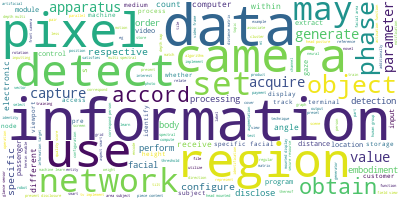

In [49]:
from wordcloud import WordCloud
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(lem_text_a)
# Visualize the word cloud
wordcloud.to_image()

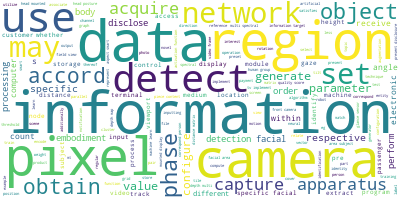

In [50]:
from wordcloud import WordCloud
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(lem_text_c)
# Visualize the word cloud
wordcloud.to_image()